In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Load Data
df = pd.read_csv('glass.dat', delim_whitespace=True)
# print(df)
df_sorted = df.sort_values(by='Al')
# print(df_sorted)
X = df_sorted['Al'].to_numpy()
Y = df_sorted['RI'].to_numpy()

C:\Users\saksh\AppData\Local\Temp\ipykernel_20000\734085970.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('glass.dat', delim_whitespace=True)


In [11]:
def gaussian_kernel(u):
    """
    Gaussian kernel function.
    """
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def epanechnikov_kernel(u):
    """
    Epanechnikov kernel function.
    """
    return (3 / 4) * np.maximum(1 - u**2, 0) # Returns 0 for |u| > 1


In [12]:
def nadaraya_watson(x, y, x_query, h, kernel):
    '''
    Compute Nadaraya Watson kernel for give x, y, x_query and h
    '''
    weights = kernel((x_query - x) / h)
    numerator = np.sum(weights * y)
    denominator = np.sum(weights)

    if denominator == 0:
        return np.nan
    
    return numerator / denominator

In [13]:
def cross_validation_bandwidth(x, y, kernel, h_values, n_splits=10):
    """Select the optimal bandwidth using cross-validation."""
    n = len(x)
    fold_size = n // n_splits
    best_h = None
    best_score = float('inf')

    for h in h_values:
        mse_list = []

        for fold in range(n_splits):
            # Split the data into training and testing sets
            test_index = list(range(fold * fold_size, (fold + 1) * fold_size))
            train_index = list(set(range(n)) - set(test_index))

            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Estimate the responses for the test set
            y_pred = [nadaraya_watson(x_train, y_train, xq, h, kernel) for xq in x_test]
            mse = np.mean((y_pred - y_test) ** 2)
            mse_list.append(mse)

        avg_mse = np.mean(mse_list)
        if avg_mse < best_score:
            best_score = avg_mse
            best_h = h

        # print(mse_list)
    
    return best_h


In [14]:
# Define a range of bandwidth values
h_values = np.linspace(0.01, 0.8, 20)

# Cross-validation to find the best bandwidth for Gaussian kernel
best_h_gaussian = cross_validation_bandwidth(X, Y, gaussian_kernel, h_values)
print(f"Optimal bandwidth for Gaussian kernel: {best_h_gaussian}")

# Cross-validation to find the best bandwidth for Epanechnikov kernel
best_h_epanechnikov = cross_validation_bandwidth(X, Y, epanechnikov_kernel, h_values)
print(f"Optimal bandwidth for Epanechnikov kernel: {best_h_epanechnikov}")


Optimal bandwidth for Gaussian kernel: 0.13473684210526318
Optimal bandwidth for Epanechnikov kernel: 0.5921052631578948


In [15]:
# Define points to query
# x_query = np.linspace(min(X), max(X), 100)
x_query = X

# Estimate using the best bandwidths found
y_est_gaussian = [nadaraya_watson(X, Y, xq, 0.1347, gaussian_kernel) for xq in x_query]  #check 0.01 0.05
y_est_epanechnikov = [nadaraya_watson(X, Y, xq, 0.59, epanechnikov_kernel) for xq in x_query] #check 0.01 0.1 0.2 0.3 0.4 0.5


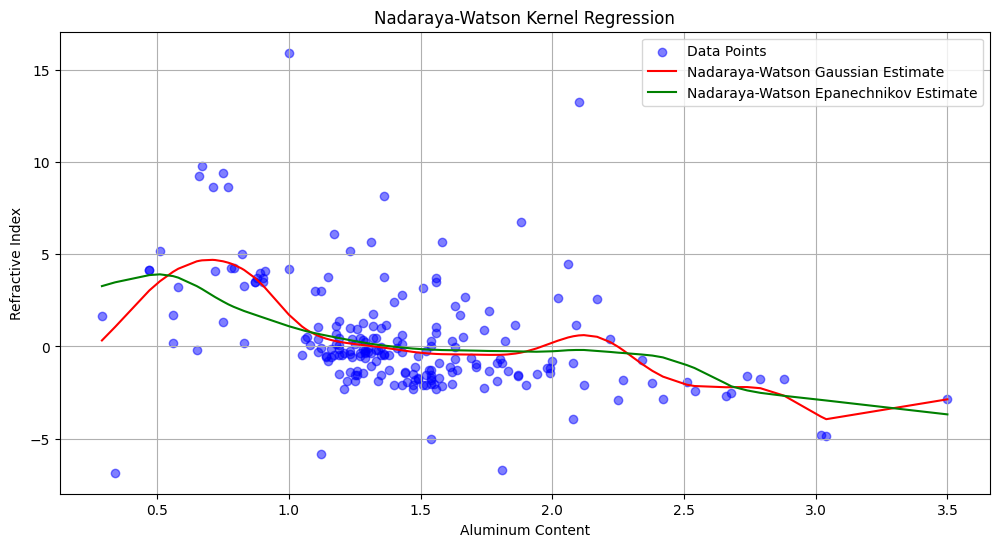

In [16]:
# Plotting results
plt.figure(figsize=(12, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.5)
plt.plot(x_query, y_est_gaussian, color='red', label='Nadaraya-Watson Gaussian Estimate')
plt.plot(x_query, y_est_epanechnikov, color='green', label='Nadaraya-Watson Epanechnikov Estimate')
plt.title('Nadaraya-Watson Kernel Regression')
plt.xlabel('Aluminum Content')
plt.ylabel('Refractive Index')
plt.legend()
plt.grid()
plt.show()
